### Libraries

In [1]:
import numpy as np
import pandas as pd
import requests
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
linreg = LinearRegression()

### Helper Functions

In [2]:
def get_average(state_name, col_name):
    data_state = pd.read_csv('https://api.covidtracking.com/v1/states/' + state_name +'/daily.csv')
    var = pd.DataFrame(data_state[col_name])
    days = []
    for i in range(var.size, 0, -1):
        days.append(i)

    var.insert(0, 'days', days)
    average_sum = 0
    for i in range(0, var[col_name].size):
        average_sum += var[col_name][i];
    
    return (average_sum/var[col_name].size)    

# COVID-19 Dataset for USA

In [3]:
x = requests.get('https://api.covidtracking.com/v1/us/daily.csv')
data_us = pd.read_csv('https://api.covidtracking.com/v1/us/daily.csv')
data_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      420 non-null    int64  
 1   states                    420 non-null    int64  
 2   positive                  419 non-null    float64
 3   negative                  372 non-null    float64
 4   pending                   369 non-null    float64
 5   hospitalizedCurrently     356 non-null    float64
 6   hospitalizedCumulative    369 non-null    float64
 7   inIcuCurrently            347 non-null    float64
 8   inIcuCumulative           348 non-null    float64
 9   onVentilatorCurrently     348 non-null    float64
 10  onVentilatorCumulative    341 non-null    float64
 11  dateChecked               420 non-null    object 
 12  death                     392 non-null    float64
 13  hospitalized              369 non-null    float64
 14  totalTestR

In [4]:
data_us

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,lastModified,recovered,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
0,20210307,56,28756489.0,74582825.0,11808.0,40199.0,878613.0,8134.0,45475.0,2802.0,...,2021-03-07T24:00:00Z,NaN,0,0,842,726,131835,41835,1170059,5468834088e2fb08a860dda6178a1faabe61edce
1,20210306,56,28714654.0,74450990.0,11783.0,41401.0,877887.0,8409.0,45453.0,2811.0,...,2021-03-06T24:00:00Z,NaN,0,0,1680,503,143835,60015,1430992,21a596203ad2c78f4e54d1e69967caf126a2a5a7
2,20210305,56,28654639.0,74307155.0,12213.0,42541.0,877384.0,8634.0,45373.0,2889.0,...,2021-03-05T24:00:00Z,NaN,0,0,2221,2781,271917,68787,1744417,a35ea4289cec4bb55c9f29ae04ec0fd5ac4e0222
3,20210304,56,28585852.0,74035238.0,12405.0,44172.0,874603.0,8970.0,45293.0,2973.0,...,2021-03-04T24:00:00Z,NaN,0,0,1743,1530,177957,65487,1590984,a19ad6379a653834cbda3093791ad2c3b9fab5ff
4,20210303,56,28520365.0,73857281.0,11778.0,45462.0,873073.0,9359.0,45214.0,3094.0,...,2021-03-03T24:00:00Z,NaN,0,0,2449,2172,267001,66836,1406795,9e1d2afda1b0ec243060d6f68a7134d011c0cb2a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,20200117,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-17T24:00:00Z,NaN,0,0,0,0,0,0,0,5fd7ed7fb0f83565ea0aaaf5ff6104e5860be2d6
416,20200116,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-16T24:00:00Z,NaN,0,0,0,0,0,0,0,4c0f2ea879eefec1a18a93bcd8a382ea56cd452d
417,20200115,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-15T24:00:00Z,NaN,0,0,0,0,0,0,0,8a449023413eea473277416e9e30ae126c6af047
418,20200114,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-14T24:00:00Z,NaN,0,0,0,0,0,0,0,fe399466a3dfbe0221a18ed5cacb39a3882d72f8


For death and cases increase in USA with day 0 starting at date 20200308 :


<AxesSubplot:xlabel='days', ylabel='positiveIncrease'>

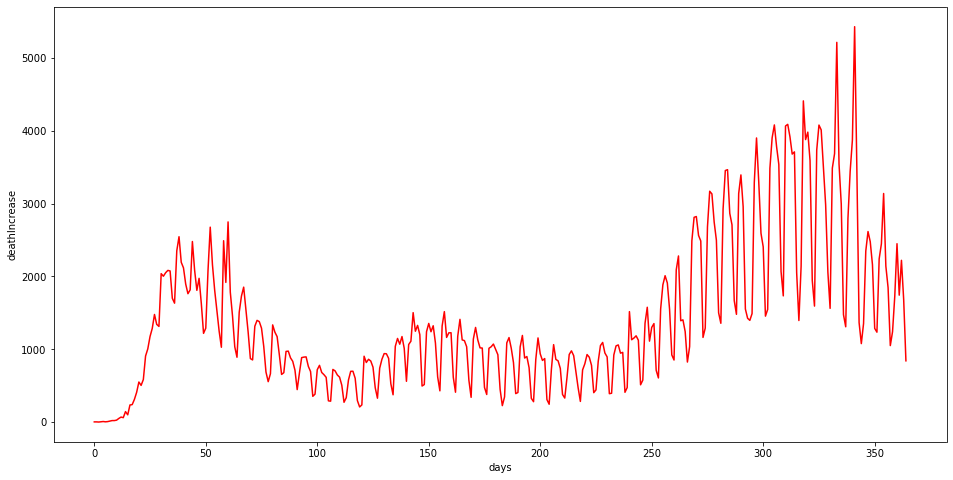

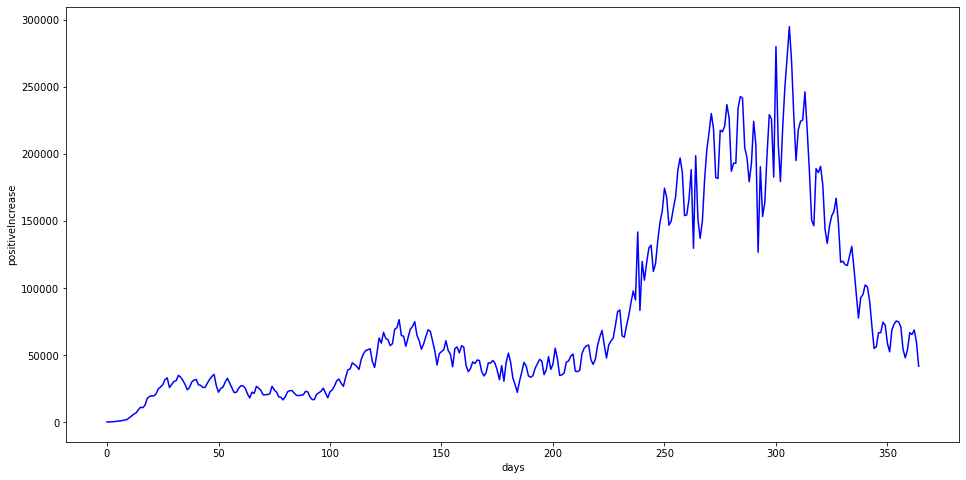

In [5]:
death = pd.DataFrame(data_us['deathIncrease'])
death = death.iloc[0:365]
cases = pd.DataFrame(data_us['positiveIncrease'])
cases = cases.iloc[0:365]
date = pd.DataFrame(data_us['date'])
date = date.iloc[0:365]
days = []

for i in range(364, -1, -1):
    days.append(i)

death.insert(0, 'days', days)
cases.insert(0, 'days', days)

print("For death and cases increase in USA with day 0 starting at date", date['date'][364], ":")

f = plt.figure(figsize=(16,8))
sb.lineplot(data = death, x ='days', y ='deathIncrease', color='red')

f = plt.figure(figsize=(16,8))
sb.lineplot(data = cases, x ='days', y ='positiveIncrease', color='blue')

# States Dataset Exploration

### Getting States Names

In [6]:
state_names = pd.read_html('https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States')
state_names = state_names[0]
state_names = state_names.iloc[:,[0,1]]
state_names = state_names['Flag, name andpostal abbreviation[12]']
state_names = state_names.set_index('Flag, name andpostal abbreviation[12]')
state_names = state_names.to_dict()['Flag, name andpostal abbreviation[12].1']

removal_list = []
for key,value in state_names.items():
    state_names[key] = value.lower()
    if(key[-1] == ']'):
        removal_list.append(key)
        
for i in removal_list:
    value = state_names[i]
    state_names.pop(i)
    state_names[i[:-3]] = value
    
state_names

{'Alabama': 'al',
 'Alaska': 'ak',
 'Arizona': 'az',
 'Arkansas': 'ar',
 'California': 'ca',
 'Colorado': 'co',
 'Connecticut': 'ct',
 'Delaware': 'de',
 'Florida': 'fl',
 'Georgia': 'ga',
 'Hawaii': 'hi',
 'Idaho': 'id',
 'Illinois': 'il',
 'Indiana': 'in',
 'Iowa': 'ia',
 'Kansas': 'ks',
 'Louisiana': 'la',
 'Maine': 'me',
 'Maryland': 'md',
 'Michigan': 'mi',
 'Minnesota': 'mn',
 'Mississippi': 'ms',
 'Missouri': 'mo',
 'Montana': 'mt',
 'Nebraska': 'ne',
 'Nevada': 'nv',
 'New Hampshire': 'nh',
 'New Jersey': 'nj',
 'New Mexico': 'nm',
 'New York': 'ny',
 'North Carolina': 'nc',
 'North Dakota': 'nd',
 'Ohio': 'oh',
 'Oklahoma': 'ok',
 'Oregon': 'or',
 'Rhode Island': 'ri',
 'South Carolina': 'sc',
 'South Dakota': 'sd',
 'Tennessee': 'tn',
 'Texas': 'tx',
 'Utah': 'ut',
 'Vermont': 'vt',
 'Washington': 'wa',
 'West Virginia': 'wv',
 'Wisconsin': 'wi',
 'Wyoming': 'wy',
 'Kentucky': 'ky',
 'Massachusetts': 'ma',
 'Pennsylvania': 'pa',
 'Virginia': 'va'}

### Flexible variable for data exploration

In [7]:
var = 'positiveIncrease' #No of COVID cases per day, extract from dataset
#'deathIncrease' 'recovered'
variable = 'Positive Increase per 1m Capita' #Name to be presented in cleaned dataset

In [8]:
avgVar_dict = {}
for name in state_names.keys():
    avgVar_dict[name] = get_average(state_names[name], var)

avgVar_dict

{'Alabama': 1365.6256830601094,
 'Alaska': 155.00272479564032,
 'Arizona': 2239.7073170731705,
 'Arkansas': 885.0626702997275,
 'California': 9488.728997289973,
 'Colorado': 1183.1978319783198,
 'Connecticut': 764.9597855227883,
 'Delaware': 240.7465940054496,
 'Florida': 4725.764851485149,
 'Georgia': 2773.6720867208674,
 'Hawaii': 77.77506775067751,
 'Idaho': 472.4890710382514,
 'Illinois': 3247.509485094851,
 'Indiana': 1779.3653333333334,
 'Iowa': 769.4386920980926,
 'Kansas': 806.1607629427793,
 'Louisiana': 1185.204918032787,
 'Maine': 125.12021857923497,
 'Maryland': 1052.4972826086957,
 'Michigan': 1763.5967741935483,
 'Minnesota': 1335.1771117166213,
 'Mississippi': 813.0628415300547,
 'Missouri': 1313.2322404371585,
 'Montana': 275.72131147540983,
 'Nebraska': 524.6149870801033,
 'Nevada': 804.8614130434783,
 'New Hampshire': 208.289972899729,
 'New Jersey': 2072.9821428571427,
 'New Mexico': 507.9402173913044,
 'New York': 4531.452830188679,
 'North Carolina': 2363.617886178

## Population Data

In [9]:
population_import = pd.read_excel('population_data.xlsx')
p_st = list(population_import.iloc[8:59, 0])
population_import = list(population_import.iloc[8:59, 12])

pst_list = []
for n in p_st:
    pst_list.append(n[1:])    
p_st = pd.DataFrame(pst_list)
p_st = p_st.rename(columns={0:'states'})

population_import = pd.DataFrame(population_import)
population_import = pd.concat([p_st, population_import], axis=1)
population = list(population_import.set_index('states').to_dict().values())[0]
population

FileNotFoundError: [Errno 2] No such file or directory: 'population_data.xlsx'

### Flexible Variable Average Increase Per Capita

In [ ]:
for i in avgVar_dict.keys():
    avgVar_dict[i] = int(avgVar_dict[i])/int(population[i])*1000000

avgVar_dict #In this case, average number of covid increase per day per 1 million capita.

In [ ]:
state_data = pd.DataFrame.from_dict(avgVar_dict, orient='index')
state_data = state_data.rename(columns={0:variable})
state_data.head()

In [ ]:
state_data.plot.barh(figsize=(20,40), fontsize=16, xlabel='States')

# Uni-Variate Data for Diversity Index

In [ ]:
race_data = pd.read_csv('Ethnicity Data.csv')
race_data.info()

race_data = race_data.set_index('Location')
race_data = race_data.iloc[:,[8]]

combined_race_data = state_data.merge(race_data, left_index = True, right_index = True)
combined_race_data

In [ ]:
sb.scatterplot(data=combined_race_data,x = 'Diversity by Simpson Index' ,y = variable)
combined_race_data.corr()

In [ ]:
Race = pd.DataFrame(combined_race_data['Diversity by Simpson Index']) 
Deaths = pd.DataFrame(combined_race_data[variable]) 

X_train, X_test, y_train, y_test = train_test_split(Race,Deaths, test_size = 0.25)

linreg = LinearRegression()
linreg.fit(X_train, y_train) 

print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [ ]:
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

# Uni-Variate for % of Smokers per State

In [ ]:
tobacco_data = pd.read_csv('Cigarette_use_USA.csv')
tobacco_data.info()

tobacco_data = tobacco_data.set_index('Location')
tobacco_data = tobacco_data.iloc[:,[0]]

combined_tobacco_data = state_data.merge(tobacco_data, left_index = True, right_index = True)
combined_tobacco_data = combined_tobacco_data.rename(columns={'Data_Value':'% of Smokers'})
combined_tobacco_data

In [ ]:
sb.scatterplot(data=combined_tobacco_data,x = '% of Smokers' ,y = variable)
combined_tobacco_data.corr()

In [ ]:
Smokers = pd.DataFrame(combined_tobacco_data['% of Smokers'])   # Response
Deaths = pd.DataFrame(combined_tobacco_data[variable]) 

X_train, X_test, y_train, y_test = train_test_split(Smokers, Deaths, test_size = 0.25)

linreg = LinearRegression()
linreg.fit(X_train, y_train) 

print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()


y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")

axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [ ]:
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

# Average Temperature per State per Year

In [ ]:
data_temp = pd.read_csv("American Temp.csv")
data_temp.info()
data_temp = data_temp.set_index('Location')

combined_data_temp = state_data.merge(data_temp, left_index = True, right_index = True)
combined_data_temp

In [ ]:
sb.scatterplot(data=combined_data_temp,x = 'Ferenheit' ,y = variable)
combined_data_temp.corr()

In [ ]:
Ferenheit = pd.DataFrame(combined_data_temp['Ferenheit'])   # Response
Deaths = pd.DataFrame(combined_data_temp[variable]) 

X_train, X_test, y_train, y_test = train_test_split(Ferenheit,Deaths, test_size = 0.25)

linreg = LinearRegression()
linreg.fit(X_train, y_train) 

print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()


y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [ ]:
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

# Uni-Variate Inpatient Expense

In [ ]:
expenses_data = pd.read_csv("expenses_data.csv")
expenses_data.info()

expenses_data = expenses_data.set_index('Location')
expenses_data = expenses_data.rename(columns={"Expenses per Inpatient Day":"Expenses"})

combined_data_expenses = state_data.merge(expenses_data, left_index = True, right_index = True)
combined_data_expenses

In [ ]:
sb.scatterplot(data=combined_data_expenses,x = 'Expenses' ,y = variable)
combined_data_expenses.corr()

In [ ]:
Expenses = pd.DataFrame(combined_data_expenses['Expenses'])   # Response
Deaths = pd.DataFrame(combined_data_expenses[variable]) 

X_train, X_test, y_train, y_test = train_test_split(Expenses,Deaths, test_size = 0.25)

linreg = LinearRegression()
linreg.fit(X_train, y_train) 

print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()


y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [ ]:
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

# Uni-Variate Demographic

In [ ]:
age_data = pd.read_csv("age_data.csv")
age_data = age_data.set_index('Location')
age_data.info()

combined_data_age = state_data.merge(age_data, left_index = True, right_index = True)
combined_data_age

In [ ]:
sb.scatterplot(data=combined_data_age,x = 'Children 0-18' ,y = variable)

In [ ]:
sb.scatterplot(data=combined_data_age,x = 'Adults 19-25' ,y = variable)

In [ ]:
sb.scatterplot(data=combined_data_age,x = 'Adults 26-34' ,y = variable)

In [ ]:
sb.scatterplot(data=combined_data_age,x = 'Adults 35-54' ,y = variable)

In [ ]:
sb.scatterplot(data=combined_data_age,x = 'Adults 55-64' ,y = variable)

In [ ]:
sb.scatterplot(data=combined_data_age,x = '65+' ,y = variable)

In [ ]:
combined_data_age.corr()

In [ ]:
numberChildren = pd.DataFrame(combined_data_age['Children 0-18'])   # Response
Deaths = pd.DataFrame(combined_data_age[variable]) 

X_train, X_test, y_train, y_test = train_test_split(numberChildren,Deaths, test_size = 0.25)

linreg = LinearRegression()
linreg.fit(X_train, y_train) 

print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()


y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [ ]:
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

# Uni-Variate GDP per Capita

In [ ]:
gdp = pd.read_csv('Current_GDP_US_States_2020_Annually.csv')
gdp = list(gdp.loc[1:, "GeoName":"2020"].set_index('GeoName').to_dict().values())[0]

gdp_state = {}
for i in avgVar_dict.keys():
    gdp_state[i] = int(gdp[i]*1000000 /population[i]) 

gdp_state = pd.DataFrame.from_dict(gdp_state, orient='index')
gdp_state = gdp_state.rename(columns={0:'GDP per Capita'})
gdp_state

In [ ]:
combined_data_gdp = state_data.merge(gdp_state, left_index = True, right_index = True)
combined_data_gdp = combined_data_gdp.rename(columns={0:variable})
combined_data_gdp

In [ ]:
sb.scatterplot(data = combined_data_gdp, y = variable, x = 'GDP per Capita')
combined_data_gdp.corr()

In [ ]:
GDP = pd.DataFrame(combined_data_gdp['GDP per Capita'])   # Response
Deaths = pd.DataFrame(combined_data_gdp[variable]) 

X_train, X_test, y_train, y_test = train_test_split(GDP, Deaths, test_size = 0.25)

linreg = LinearRegression()
linreg.fit(X_train, y_train) 

print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()


y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")

axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [ ]:
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

# Multi-Variate for all Values

In [ ]:
combined_data = pd.concat([combined_race_data,
                        combined_tobacco_data,
                        combined_data_temp,
                        combined_data_expenses,
                        combined_data_gdp,
                        combined_data_age], axis=1)

combined_data = combined_data.loc[:,~combined_data.columns.duplicated()]
combined_data = combined_data.loc[:,:"65+"]
combined_data

In [ ]:
combined_data.corr()

In [10]:
predictor = pd.DataFrame(combined_data.iloc[:,1:])
response = pd.DataFrame(combined_data.iloc[:,0])

X_train, X_test, y_train, y_test = train_test_split(predictor, response, test_size = 0.25)
linreg = LinearRegression()
linreg.fit(X_train, y_train) 

print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()
plt.plot(y_test)
plt.plot(y_test_pred)

NameError: name 'combined_data' is not defined